In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# **1. Inspecting the dataframe**

In [ ]:
# Check the number of rows and columns in the dataframe
df.shape

(730, 16)

In [ ]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Check the summary for the numeric columns 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
! pip install klib
#visualize missing values if any
import klib
klib.missingval_plot(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
No missing values found in the dataset.


In [ ]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# **2. Data Cleaning and Analysis**

In [ ]:
#Changing the season, weathersit, mnth, weekday columns from numerical values to categorical strings
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weathersit=df.weathersit.map({1:'Best', 2:'Neutral', 3:'Bad', 4:'Worse'})
df.mnth=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday=df.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Note: For the column weathersit, the alias is**

**Best** :
Clear, Few clouds, Partly cloudy, Partly cloudy

**Neutral**:
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

**Bad** :
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

**Worse** :
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
#The column 'instant' is very insignificant. Hence dropping that column.
df=df.drop('instant',axis=1)
df.shape

(730, 15)

In [ ]:
#Inserting a new variable day in the dataframe.
df.insert(4,'day','')
df['day']=pd.DatetimeIndex(df['dteday']).day
df.head()

,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,1,0,Mon,1,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,1,0,Tue,1,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,1,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,1,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,1,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
print('------------------day values------------------')
print(df.day.value_counts())
print('--------------workingday values---------------')
print(df.workingday.value_counts())
print('----------------weekday values----------------')
print(df.weekday.value_counts())

------------------day values------------------
1     24
26    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
2     24
28    24
13    24
27    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
12    24
29    22
30    22
31    14
Name: day, dtype: int64
--------------workingday values---------------
1    504
0    226
Name: workingday, dtype: int64
----------------weekday values----------------
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64


In [ ]:
#dropping dteday
df=df.drop('dteday', axis=1)
df.shape

(730, 15)

**Visualization**

**2.1 Univariate Analysis**

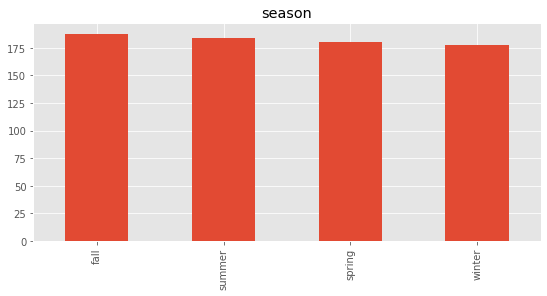

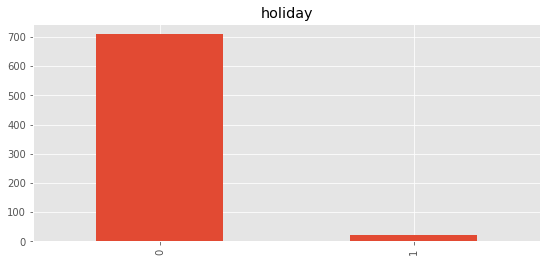

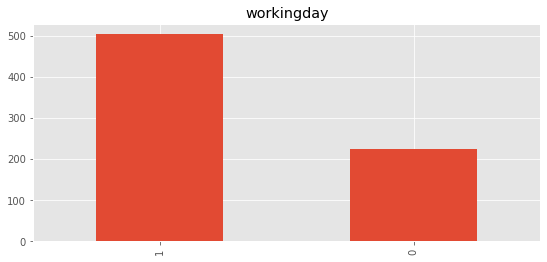

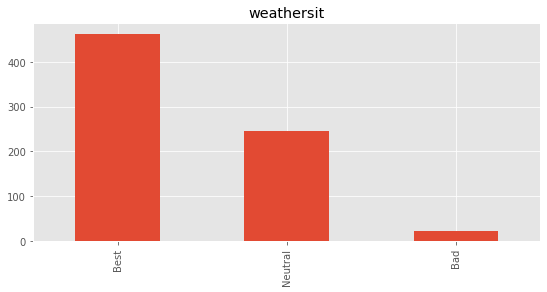

In [ ]:
# Univariate analysis of few seemingly significant categorical variables:
univariate_categorical_cols=['season','holiday','workingday','weathersit']
plt.style.use('ggplot')
for column in univariate_categorical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [ ]:
print('Number of holidays in 2018: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2019: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2018:  10
Number of holidays in 2019:  11


## **Inferences:**

2. The number of public holidays is 21 in 2 years. Number of holidays in 2018 and 2019 are 10 and 11 respectively
3. The number of non-working days(Public holidays+weekends) is slightly less than half the number of working days which can be favourable for bike renting for exploring different places during non working days but can be non-favourable as well since the daily commute to office during the working days can be hampered.
4. Weather situation is mostly best case scenario and neutral compared to bad and worse which is favourable for renting bikes.

In [ ]:
# Univariate analysis of few seemingly significant continuous variables:
univariate_numerical_cols=df.select_dtypes(include=np.number)
univariate_numerical_cols=list(univariate_numerical_cols)
univariate_numerical_cols
univariate_continuous_var=[i for i in univariate_numerical_cols if i not in ['yr',
 'mnth',
 'day',
 'holiday',
 'weekday',
 'workingday']]
univariate_continuous_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

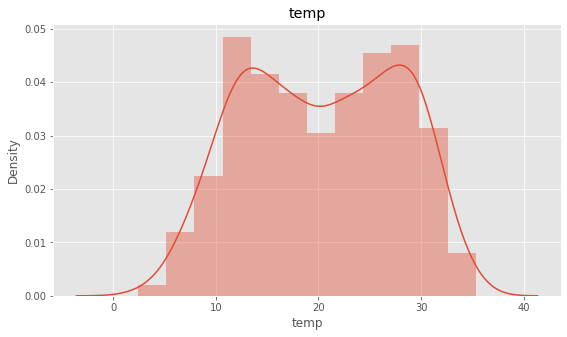

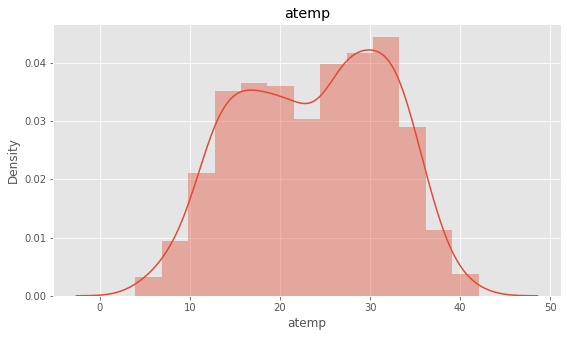

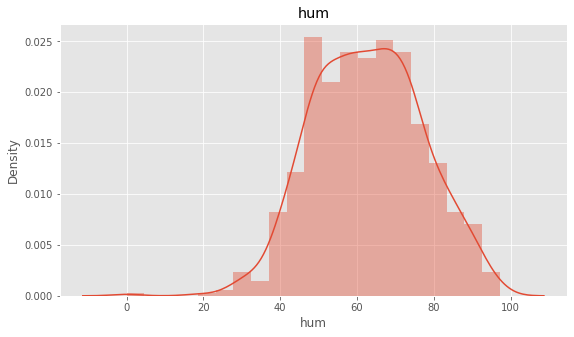

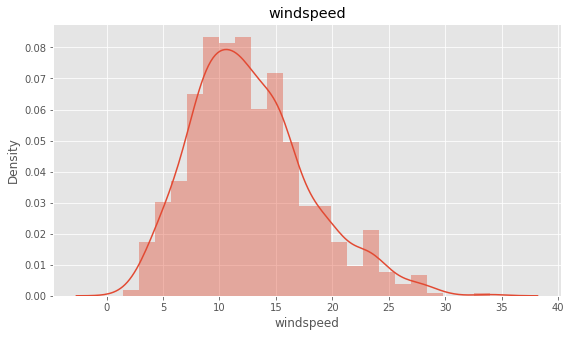

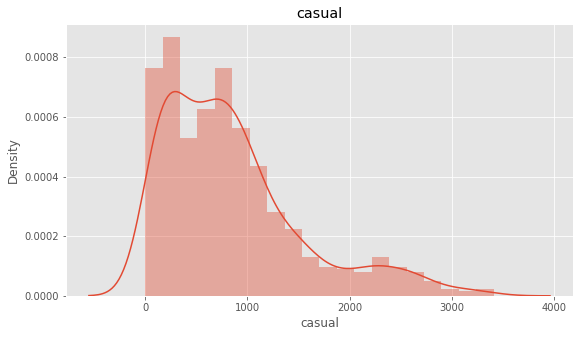

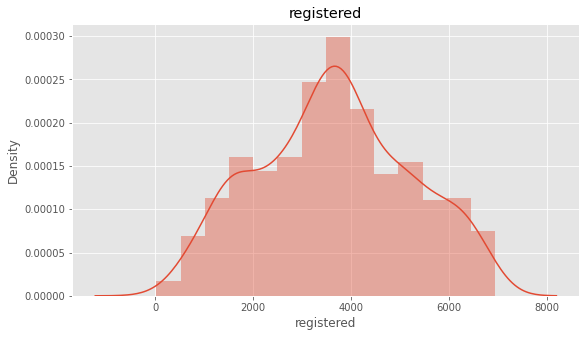

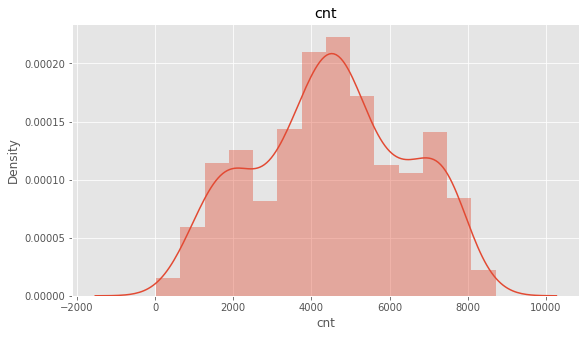

In [ ]:
for column in univariate_continuous_var:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

## **Inferences:**
1. Values of temperature and feeling temperature are differently distributed.
2. Humidity is almost randomly distributed with a mean of around 61-63.
3. The KDE of windspeed is almost a normal distribution with a right skew because of a few days with windspeed over 30.
4. The spread of casual users is not normally distributed where as that of registered users is normally distributed ultimately leading to cnt to be spread normally distributed.

### **2.2 Bivariate Analysis**


In [ ]:
df_continuous=df[univariate_continuous_var]


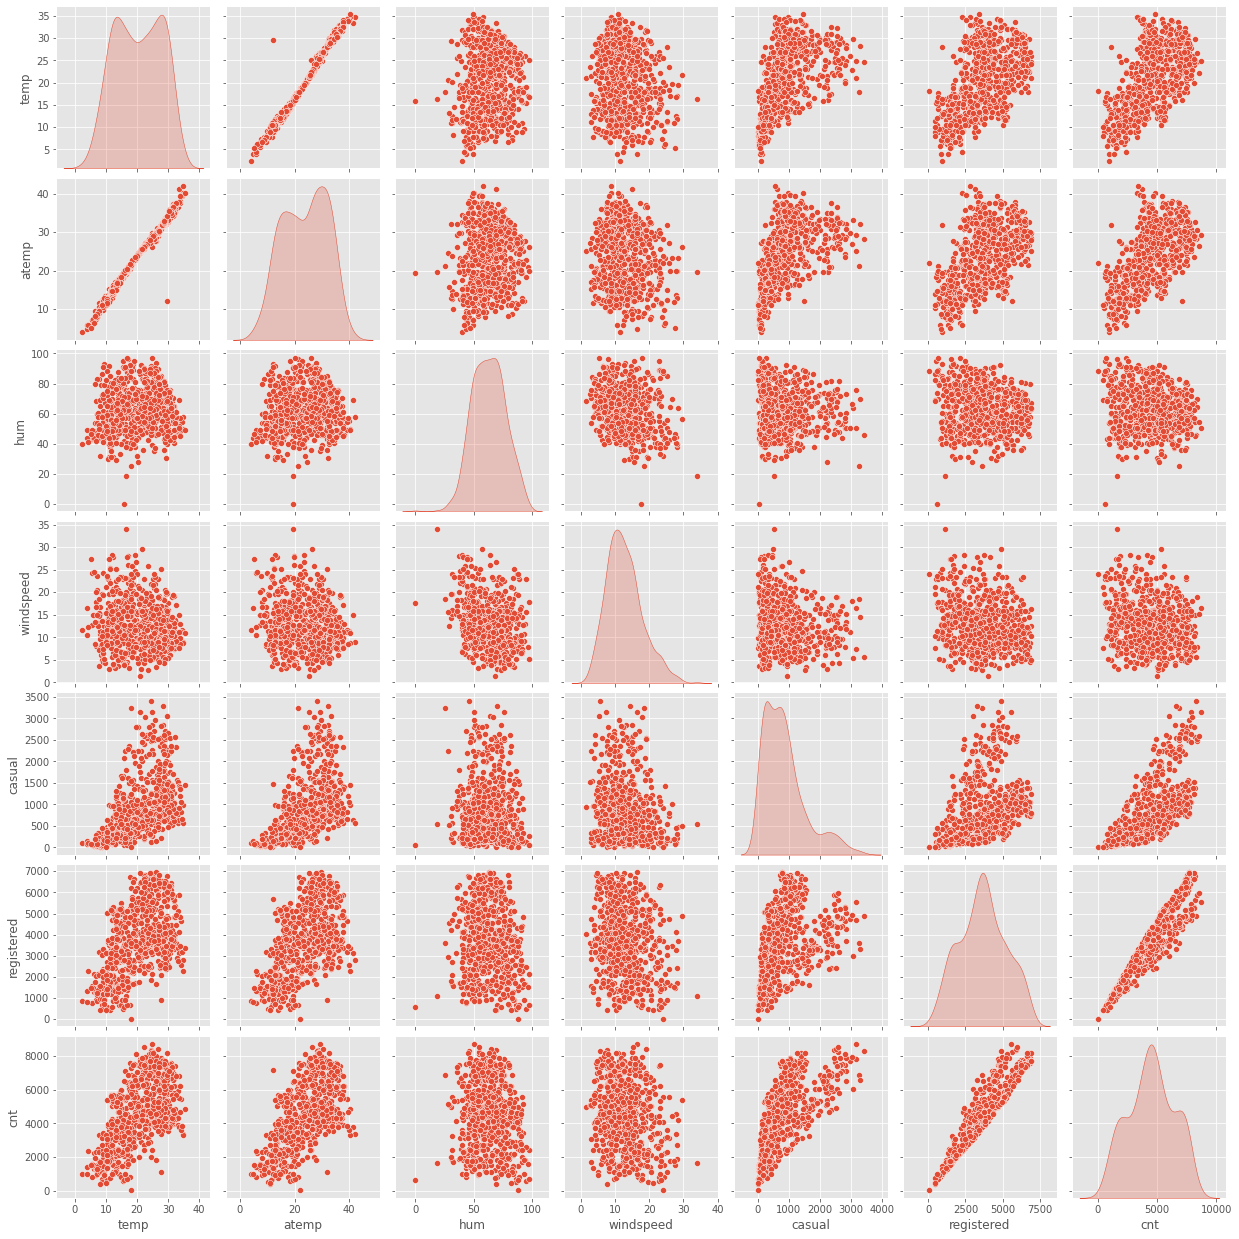

In [ ]:
#Bivariate analysis of continuos variables with cnt
sns.pairplot(df_continuous,diag_kind='kde')
plt.show()

**Inference**
1. Huge corelation between temp and atemp. Hence only one of the 2 variables will be in the model.
2. temp/atemp shows some linear relationship with cnt.
3. hum and windspeed doesn't show much of a linear relationship with cnt.
4. Casual and registered shows linear relationship with cnt out of which the linear relationship shown by registered users is very significant.
5. Rest there are not any significant linear relationships.

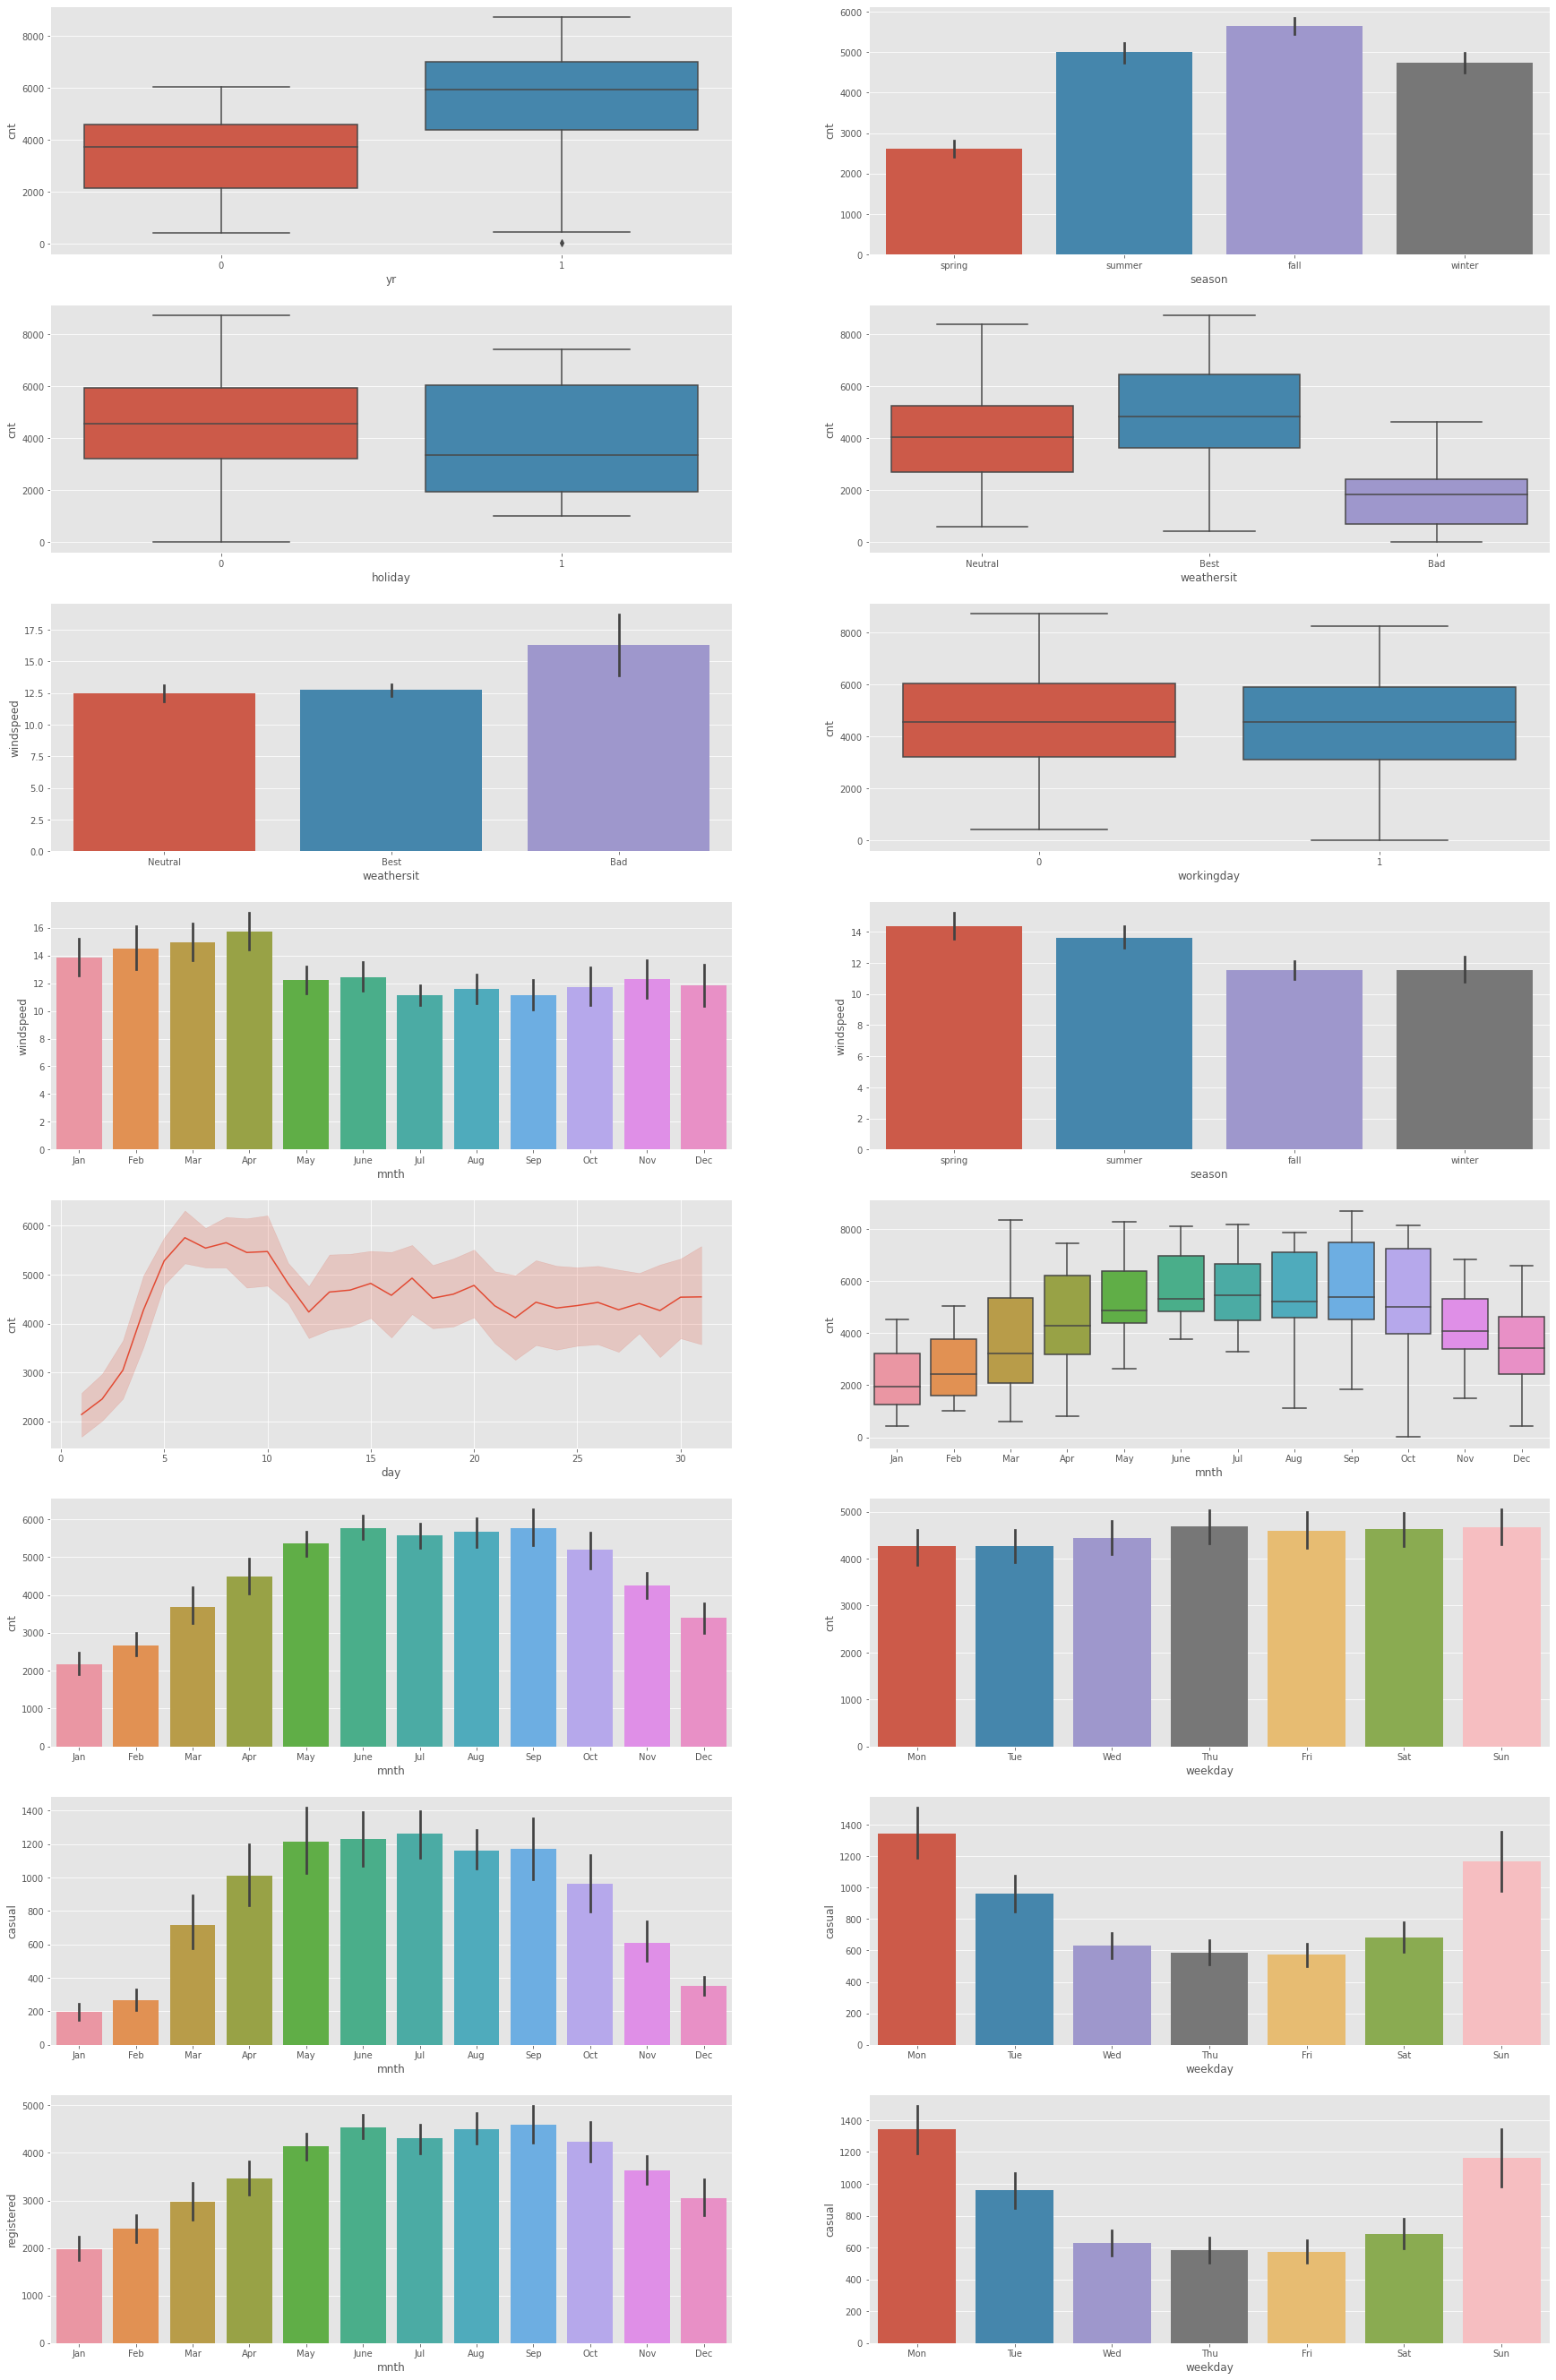

In [ ]:
#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,9)
sns.lineplot(x='day', y='cnt', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()

In [ ]:
print('------------Winter Months-------------------------')
print('Months')
print(df[df['season']=='winter'].mnth.value_counts())
print('------------Spring Months-------------------------')
print('Months')
print(df[df['season']=='spring'].mnth.value_counts())
print('------------Summer Months-------------------------')
print('Months')
print(df[df['season']=='summer'].mnth.value_counts())
print('--------------Fall Months-------------------------')
print('Months')
print(df[df['season']=='fall'].mnth.value_counts())

------------Winter Months-------------------------
Months
Oct    62
Nov    60
Dec    40
Sep    16
Name: mnth, dtype: int64
------------Spring Months-------------------------
Months
Jan    62
Feb    56
Mar    40
Dec    22
Name: mnth, dtype: int64
------------Summer Months-------------------------
Months
May     62
Apr     60
June    40
Mar     22
Name: mnth, dtype: int64
--------------Fall Months-------------------------
Months
Jul     62
Aug     62
Sep     44
June    20
Name: mnth, dtype: int64


### **Inferences**
1. The cnt in the year 2019 was way more than that in 2018. The 75th percentile of the cnt in 2018 is almost equivalent to 25 percentile in 2019.
2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.
3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.
4. Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week but Monday and tuesday have relatively less bookings.
5. The average count of bikes rented is more during non-public holidays.
6. The average count of bikes rented when the weather is situation is 'Clear, Few clouds, Partly cloudy, Partly cloudy' or 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' termed as 'Best' and 'Neutral' is much more compared to other situations termed as 'Bad' and 'Worse'- Wind speed during the bad weather situations is more than 'Best' and 'neautral' weather situations and hence more number of bikes are rented in such situations.
7. The line-graph trend shows that the count of bikes rented is least from 1st-4th day, peaks from 6th-10th day in a month and again dips till 13th day and kind of stays almost constant throughout the month.
8. There was a drop of bike rents by casual users in the winters and in the first 2 months of spring and less drop in the registered users. These people may be regular office going people or fitness enthusiasts.

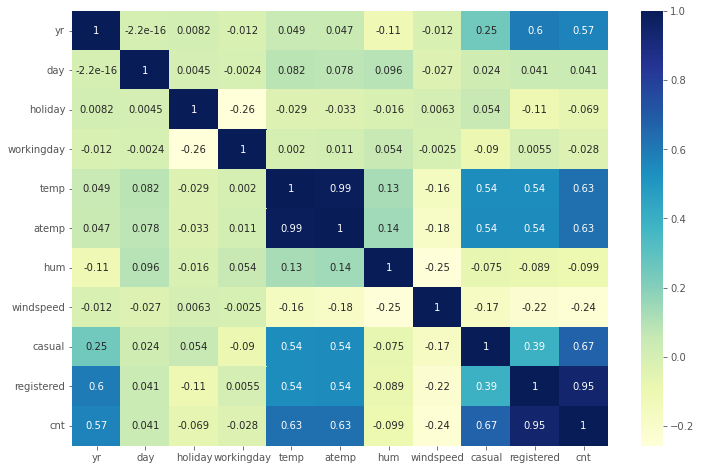

In [ ]:
#Checking the colinearlity amongst the variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [ ]:
df=df.drop(['casual', 'registered'],axis=1)
df.head()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,1,0,Mon,1,Neutral,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,1,0,Tue,1,Neutral,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,1,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,1,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,1,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,1600


Also temp and atemp are very highly corelated and their respective colinearities with cnt are also same. Hence dropping atemp since feeling temperature can be relatively less accurate compared to temperature.

In [ ]:
df=df.drop('atemp',axis=1)


In [ ]:
df.head()


,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,1,0,Mon,1,Neutral,14.110847,80.5833,10.749882,985
1,spring,0,Jan,1,0,Tue,1,Neutral,14.902598,69.6087,16.652113,801
2,spring,0,Jan,1,0,Wed,1,Best,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,1,0,Thu,1,Best,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,1,0,Fri,1,Best,9.305237,43.6957,12.522300,1600


### **3. Preparing data for modelling**

In [ ]:
#Creating Dummy variables

def dummies(x,dataframe):
    temp = pd.get_dummies(dataframe[x], drop_first = True)
    dataframe = pd.concat([dataframe, temp], axis = 1)
    dataframe.drop([x], axis = 1, inplace = True)
    return dataframe
# Applying the function to the bikeSharing

df = dummies('season',df)
df = dummies('mnth',df)
df = dummies('weekday',df)
df = dummies('weathersit',df)
df.head()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
0,0,1,0,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape


(730, 30)

In [ ]:
df.describe()


,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,15.720548,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.336986
std,0.500343,8.802278,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.473004
min,0.000000,1.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,16.000000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,23.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**3.1 Spliting the data into test and train**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(df,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### **3.2 Rescalling the features:**

In [ ]:
#Rescaling even the target variables since a target variable with a large spread of values, in turn, may result 
#in large error gradient values causing weight values to change dramatically, making the learning process unstable.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

need_rescale=['temp','hum','windspeed','cnt']
df_train[need_rescale]=scaler.fit_transform(df_train[need_rescale])

df_train.describe()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,15.631373,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098
std,0.500429,8.852724,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,16.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,23.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **3.3 Splitting train dataset into X and y**


In [ ]:
y_train=df_train.pop('cnt')
X_train=df_train

## **4. Model Building**

In [ ]:
#Since the total number of variables are 30, using RFE to calculate the best 15 variables to be used for model building

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm)

rfe=rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('day', False, 16),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Best', True, 1),
 ('Neutral', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Nov', 'Sep', 'Best', 'Neutral'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]


Index(['day', 'workingday', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Oct',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [ ]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Nov,Sep,Best,Neutral
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


**After minimizing the number of variables using RFE, using statsmodel to build an optimized model.**


In [ ]:
#Defining 2 functions model and VIF to train model and calculate VIF repeatatively.
import statsmodels.api as sm

def model(X,y):
    X=sm.add_constant(X)
    lm_model=sm.OLS(y,X).fit()
    print(lm_model.summary())
    return X

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)

**First Model:**

In [ ]:
#Training the first model
X_train1=model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          4.41e-189
Time:                        21:57:50   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0629      0.047      1.326      0.1

In [ ]:
#Calculating Variance Inflation Factor
VIF(X_train1)

In [ ]:
#VIF of Best > 10. But according to experience it seems people are more likely to use bikes in the best weather situations
# andhence seems significant.
#Let's drop Dec to see the difference in the significance of other variables and R squared
X_train1=X_train1.drop('Nov',axis=1)

**Second Model**

In [ ]:
X_train1=model(X_train1,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          7.59e-190
Time:                        22:00:00   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0572      0.047      1.210      0.2

In [ ]:
VIF(X_train1)


In [ ]:
X_train1=X_train1.drop('Sep',axis=1)


### **Fourth Model**

In [ ]:
X_train1=model(X_train1,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          7.66e-186
Time:                        22:02:24   Log-Likelihood:                 498.82
No. Observations:                 510   AIC:                            -971.6
Df Residuals:                     497   BIC:                            -916.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0816      0.048      1.697      0.0

In [ ]:
VIF(X_train1)


In [ ]:
#All the variables seems significant now after evaluating P>|t| and VIF

#R squared from model summary is 0.842
r2=0.842

#Calculating adjusted R squared:
n = X_train1.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_train1.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8378588709677419

**The variables Best has a VIF slightly greater than 10. But best case weather scenario must be kept while building the model. Hence considering the above model to be the ideal one. But let's drop a few more variables to see the changes in R squared, F-statistic and Prob (F-statistic) and if we could come up with a better model**





In [ ]:
X_train1=X_train1.drop('Best',axis=1)


**Fifth Model**

In [ ]:
X_train1=model(X_train1,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     192.4
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          2.35e-171
Time:                        22:04:41   Log-Likelihood:                 461.71
No. Observations:                 510   AIC:                            -899.4
Df Residuals:                     498   BIC:                            -848.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3736      0.038      9.963      0.0

### The value of R squared decreased and value of F-statistic dropped significantly which shows that the fourth model was more fit then the fifth. Still trying to drop spring to see if better model can be achieved.

In [ ]:
VIF(X_train1)


In [ ]:
X_train1=X_train1.drop('spring',axis=1)


**Sixth Model**

In [ ]:
X_train1=model(X_train1,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          1.76e-170
Time:                        22:06:55   Log-Likelihood:                 456.87
No. Observations:                 510   AIC:                            -891.7
Df Residuals:                     499   BIC:                            -845.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.030     10.105      0.0

In [ ]:
#The value of R squared remained the same but the value of F-statistic has increased and almost similar to our ideal fourth model.
#This can be our another ideal model. 
#Even though Neutral is one more vital variable for our ideal fourth model, its p-value is higher. 
#Let's try to drop that variable.

In [ ]:
VIF(X_train1)


In [ ]:
X_train1=X_train1.drop('Neutral',axis=1)


**Seventh Model**

In [ ]:
X_train1=model(X_train1,y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          5.66e-171
Time:                        22:08:13   Log-Likelihood:                 455.22
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     500   BIC:                            -848.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3163      0.029     10.858      0.0

In [ ]:
VIF(X_train1)


**This model again has lesser R squared than the fourth model but the F-statistic is much more than that.**

There are 2 models that can be considered as the best fits:
Fourth model and the Seventh model

### **5. Residual Analysis of the trained data**

In [ ]:
#Rebuilding the seventh model
lm_model7=sm.OLS(y_train,X_train1).fit()
y_train_pred7=lm_model7.predict(X_train1)

Text(0.5, 0, 'Errors')

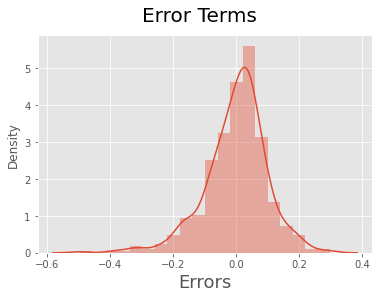

In [ ]:
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_pred7), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [ ]:
#Rebuilding the fourth model
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Nov,Sep,Best,Neutral
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [ ]:
X_train_rfe.drop(['Sep','Nov','Jan'], axis=1, inplace=True)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,Jul,Best,Neutral
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,1,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,1


Columns of X_train_rfe are similar to the fourth model



In [ ]:
lm_model4=sm.OLS(y_train,X_train_rfe).fit()
y_train_pred4=lm_model4.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

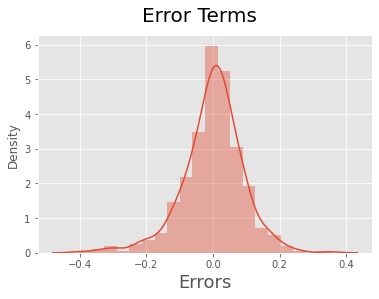

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Residual Analysis shows that error terms for both the models gives almost a normal distribution but the R squared value is better for the fourth model compared to the seventh model. Also normality of error distribution is slightly better for fourth model compared to seventh model.

**Hence selecting the fourth model for prediction.**
## 6. Making Predictions
### 6. 1 Preparing data for prediction.

In [ ]:
df_test.head()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
184,0,7,1,0,29.793347,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,20,0,1,32.082500,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,27,0,0,19.270000,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,8,0,1,31.433347,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,6,0,0,29.315000,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#rescaling columns from the list need_rescale=['temp','hum','windspeed','cnt']

df_test[need_rescale]=scaler.transform(df_test[need_rescale])

df_train.head()

,yr,day,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
576,1,31,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,3,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,30,0,1,0.245101,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,28,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,22,0,0,0.345824,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df_test.describe()


,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Best,Neutral
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,15.927273,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.318182
std,0.500809,8.700715,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.466833
min,0.000000,1.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.500000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,24.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,31.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 6.2 Prediction with model 4


In [ ]:
y_test=df_test.pop('cnt')
X_train_rfe=X_train_rfe.drop('const',axis=1)
X_test_model4=df_test[X_train_rfe.columns]
X_test_model4.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Jul,Best,Neutral
184,0,1,0.831783,0.657364,0.084219,0,0,0,1,0,1
535,1,0,0.901354,0.610133,0.153728,0,1,0,0,1,0
299,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,1
221,0,0,0.881625,0.437098,0.339570,0,0,0,0,1,0
152,0,0,0.817246,0.314298,0.537414,0,1,0,0,1,0


In [ ]:
X_test_model4.shape


(220, 11)

In [ ]:
#Adding constant to dataframe
X_test_model4=sm.add_constant(X_test_model4)

In [ ]:
#Prediction
y_test_pred_model4=lm_model4.predict(X_test_model4)

In [ ]:
#Calculating Test data R-squared:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_test_pred_model4)
print(r2)

0.8125967930804852


In [ ]:
#Calculating adjusted R squared:
n = X_test_model4.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_model4.shape[1]

# Calculating Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8017328390561654

**Train R squared: 0.842**

**Train Adjusted R squared: 0.8378588709677419**

**Test R squared: 0.8378588709677419**

**Test Adjusted R squared: 0.8035100851613118**

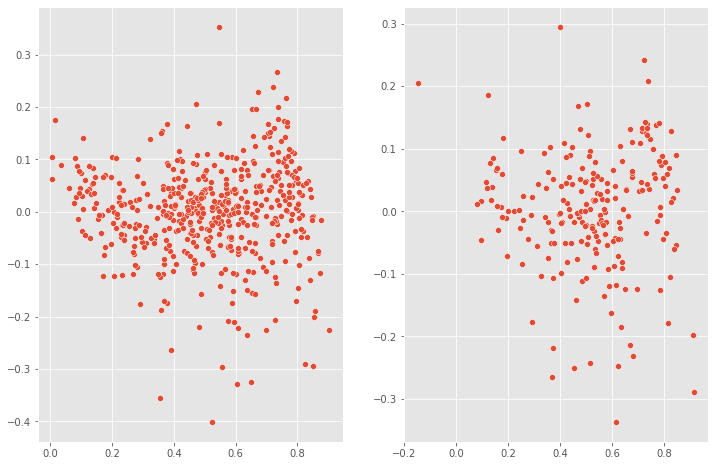

In [ ]:
#Checking Homoscedasticity for train and test data
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(y=y_train - y_train_pred4, x=y_train_pred4)
plt.subplot(1,2,2)
sns.scatterplot(y=y_test - y_test_pred_model4, x=y_test_pred_model4)
plt.show()

**There is no clustering or pattern below or above 0.0 on the Y-axis. This model is giving best results compared to other 6 models formed earlier while training.**

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_model4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_model4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_model4)))


Mean Absolute Error: 0.07017870435054306
Mean Squared Error: 0.008960549316244912
Root Mean Squared Error: 0.09466017809113245


### **Lower values of MAE, MSE and RMSE shows vouches for the good performance of the model.**


Text(0, 0.5, 'y_test_pred_model4')

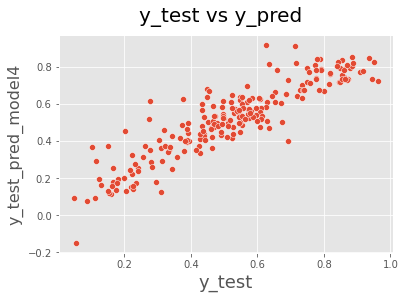

In [ ]:
# understanding the spread.
fig = plt.figure()
sns.scatterplot(y_test,y_test_pred_model4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred_model4', fontsize=16) 

Based on the very close value of R squared and Adjusted R squared values of the train and test data sets and based on y_test and y_pred graph, it can be infereed that the our linear regression model has the below equation for it's best fitted line:

**cnt= 0.0478 + 0.2294 yr -0.0969 holiday + 0.5299 temp -0.1726 hum -0.1822 windspeed -0.0564 spring + 0.0531 summer+ 0.0976 winter -0.0572 Jul + 0.0833 sept + 0.2369 (Clear, Few clouds, Partly cloudy, Partly cloudy) + 0.1843 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)**

In [ ]:
print(lm_model4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          3.17e-186
Time:                        22:24:18   Log-Likelihood:                 496.91
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     498   BIC:                            -919.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.048      1.501      0.1

## **Hypothesis Testing**

**Null hypothesis states that there is no relationship between the X variables and the Y variables meaning the coefficients of the independent variables is zero. From the final model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS**

The company should focus on the following factors:
1. People are less likely to use their service at low or extreme temperatures. So either the company can function to half the capacity or minimum capacity to reduce operational costs for better profits and provide service for regular registered customers mostly. Similarly in days with increase in humidity and windspeed. Discounts or offers won't help as well since it's inconvenient to commute using bikes in such situations.
2. There will be increase in the number of users with increase in year since people will start adapting to renting bikes more often. There might be chances that because of covid just been around the corner, the trend might not follow immediately but giving a year more will definitely see rise in number of users.
3. People are more likely to use their service in the best or the neutral weather environments i.e;Clear, Few clouds, Partly cloudy, Partly cloudy OR Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.